## Linear Regression

##### The main aim of this kernel is to use Linear regression in order to figure out how to maximize the Yearly Amount spent by the customers

#### Import all the library

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Importing data

In [2]:
ecomm_cust_df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
ecomm_cust_df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
ecomm_cust_df.shape

(500, 8)

In [4]:
ecomm_cust_df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Lets explore data

In [8]:
ecomm_cust_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
ecomm_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Lets Start Exploring the data, by exploring relationship across the data by creating pairplot

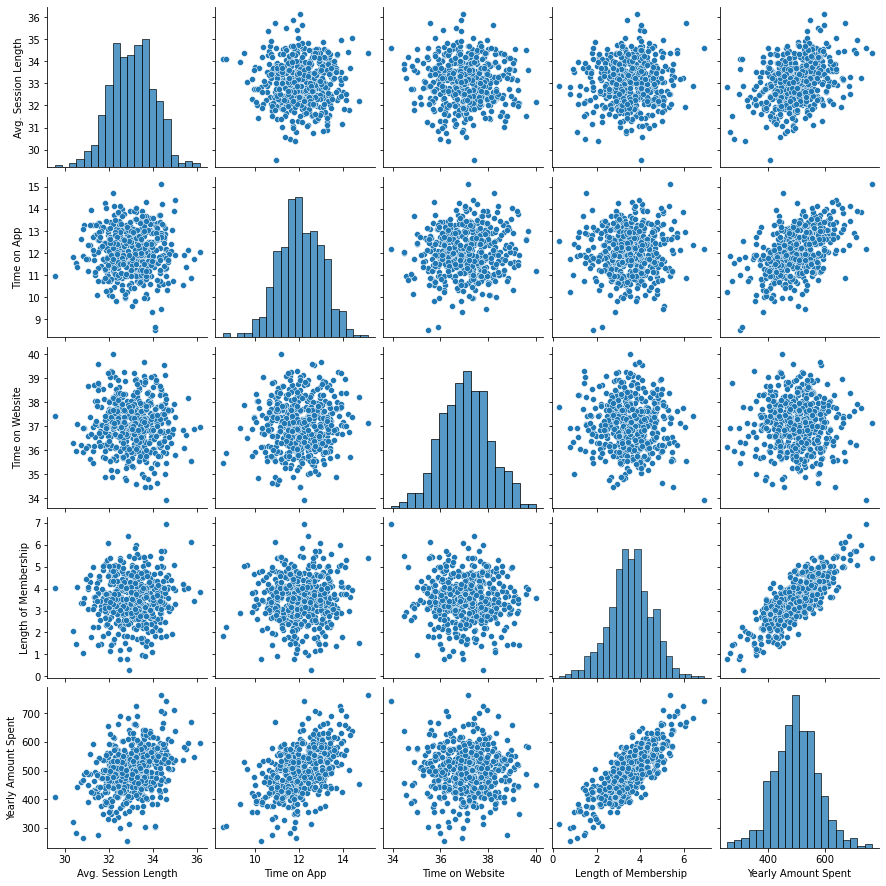

In [10]:
sns.pairplot(ecomm_cust_df)

#### Exploring the relationship between two features using jointplot

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


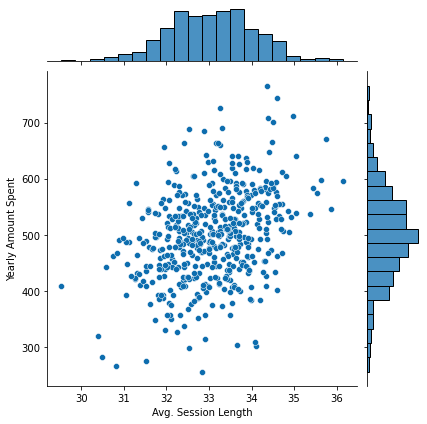

In [13]:
sns.jointplot(ecomm_cust_df['Avg. Session Length'], ecomm_cust_df['Yearly Amount Spent'])

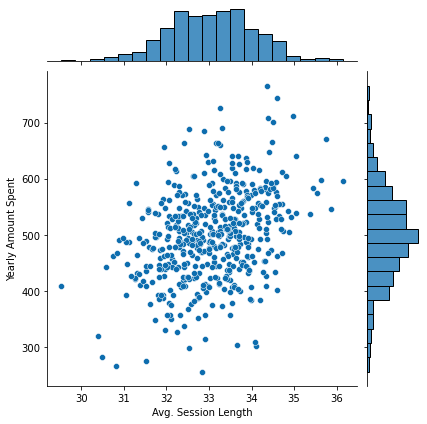

In [14]:
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=ecomm_cust_df)

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


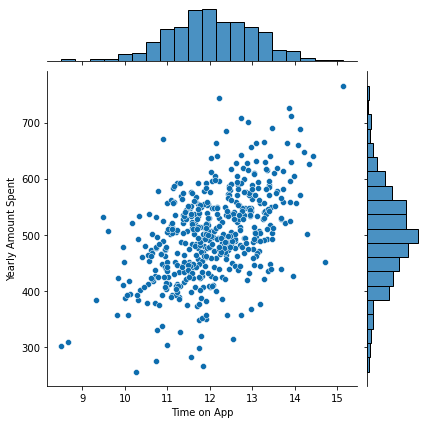

In [15]:
sns.jointplot(ecomm_cust_df['Time on App'], ecomm_cust_df['Yearly Amount Spent'])

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


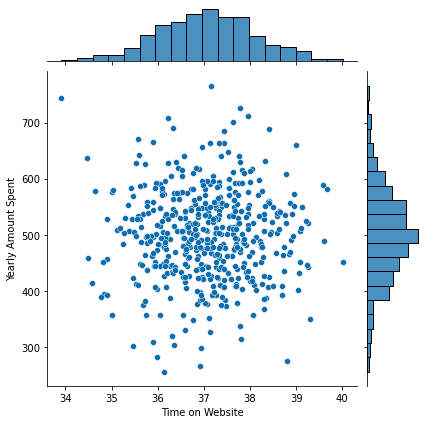

In [16]:
sns.jointplot(ecomm_cust_df['Time on Website'], ecomm_cust_df['Yearly Amount Spent'])

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


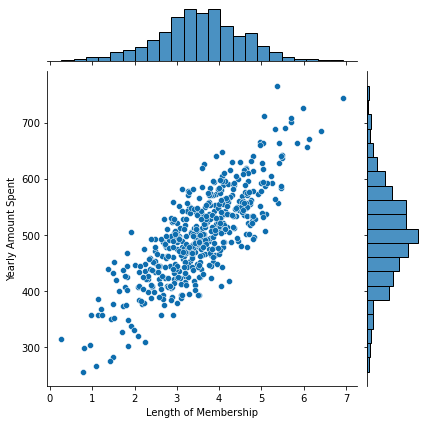

In [17]:
sns.jointplot(ecomm_cust_df['Length of Membership'], ecomm_cust_df['Yearly Amount Spent'])

#### Drop unwanted/ unnecessary feature from dataFrame

In [18]:
ecomm_cust_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
ecomm_customer_df = ecomm_cust_df.drop(columns=['Email', 'Address', 'Avatar'], axis=1)

In [21]:
ecomm_customer_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


#### Exploring the co-relation between features using heatmap

<AxesSubplot:>

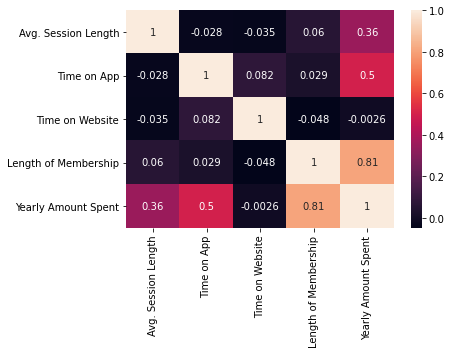

In [27]:
sns.heatmap(data = ecomm_customer_df.corr(), annot=True)

#### Split the data in x and y(target feature)

In [28]:
x = ecomm_customer_df.drop(columns=['Yearly Amount Spent'])

In [29]:
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [30]:
y = ecomm_customer_df['Yearly Amount Spent']

In [31]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

#### Split x and y data into X_train, X_test, Y_train, Y_test 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=True)

In [41]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
238,31.260647,13.266760,36.971195,2.267251
438,32.149061,10.047315,37.181447,3.535088
475,33.811733,11.186809,36.298893,4.301996
58,32.843930,11.832286,36.814011,3.471919
380,33.385990,12.782172,35.550772,3.228718
...,...,...,...,...
255,33.136655,13.891313,39.220713,2.907095
72,32.386252,10.674653,38.006583,3.401522
396,35.742670,10.889828,35.565436,6.115199
235,33.177205,11.622777,35.968896,3.634094


In [43]:
y_train.shape

(400,)

#### import linear regression class from sklearn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
LRobj = LinearRegression()   # Create object of LinearRegression class

#### Fit the training data into linear regression model

In [49]:
model = LRobj.fit(X_train,y_train)

In [50]:
model

LinearRegression()

#### Find the cofficient/ slope and intercept of each feacture with target feature

In [51]:
model.coef_

array([25.78854257, 38.85150472,  0.25638467, 61.49204989])

In [52]:
model.intercept_

-1047.739205263644

#### Now, we have our fit model lets see how well we can predict the test values

In [53]:
y_predict = model.predict(X_test)

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


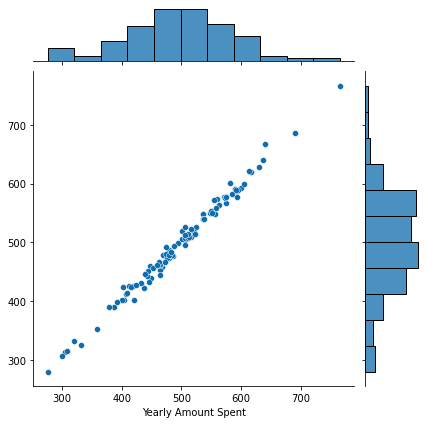

In [48]:
sns.jointplot(y_test,y_predict)

C:\Users\kisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

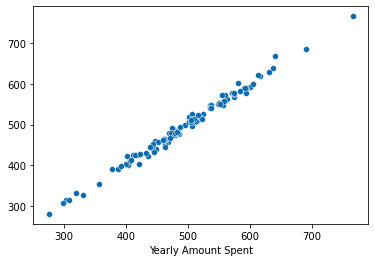

In [54]:
sns.scatterplot(y_test,y_predict)

In [55]:
model.score(X_test,y_predict)

1.0

In [56]:
model.score(X_test,y_test)

0.9892888134002329

#### Now lets evaluate the model---- Check accuracy

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mean Square Error

In [59]:
MSE = mean_squared_error(y_test,y_predict)

In [60]:
MSE

78.29571004020202

In [ ]:
# Mean Absolute Error

In [61]:
MAE = mean_absolute_error(y_test,y_predict)

In [62]:
MAE

6.823236666419797

In [ ]:
# Square Root Mean Square Error

In [63]:
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))

In [64]:
RMSE

8.848486313500294

In [69]:
accuracy_df = pd.DataFrame([MSE,MAE,RMSE],['Mean Square Error','Mean Absolute Error','Square Root Mean Square Error'], columns=['Accuracy'] )

In [70]:
accuracy_df

,Accuracy
Mean Square Error,78.295710
Mean Absolute Error,6.823237
Square Root Mean Square Error,8.848486


In [72]:
cofficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coeff'] )

In [73]:
cofficient_df

,Coeff
Avg. Session Length,25.788543
Time on App,38.851505
Time on Website,0.256385
Length of Membership,61.492050
